<a href="https://colab.research.google.com/github/MarkLukyanov/car_price_pred/blob/main/EDA_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подержанные автомобили

Датасет содержит информацию о характеристиках и ценах подержанных автомобилей в некоторой стране

## Импорт библиотек, константы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/cars.csv"

In [4]:
!pip install scikit-learn==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [5]:
import sklearn
sklearn.__version__

'1.4.0'

Ставим данную версию как в ноутбуке, так и в среде разработке на компьютере, чтобы модели работали корректно.

## Загрузка и обзор данных

### Загрузка

In [6]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `selling_price`: цена продажи, числовая

**Признаки**
- `name` (string): модель автомобиля
- `year` (numeric, int): год выпуска с завода-изготовителя
- `km_driven` (numeric, int): пробег на дату продажи
- `fuel` (categorical: _Diesel_ или _Petrol_, или _CNG_, или _LPG_, или _electric_): тип топлива
- `seller_type` (categorical: _Individual_ или _Dealer_, или _Trustmark Dealer_): продавец
- `transmission` (categorical: _Manual_ или _Automatic_): тип трансмиссии
- `owner` (categorical: _First Owner_ или _Second Owner_, или _Third Owner_, или _Fourth & Above Owner_): какой по счёту хозяин?
- `mileage` (string, по смыслу числовой): пробег, требует предобработки
- `engine` (string, по смыслу числовой): рабочий объем двигателя, требует предобработки
- `max_power` (string, по смыслу числовой): пиковая мощность двигателя, требует предобработки
- `torque` (string, по смыслу числовой, а то и 2): крутящий момент, требует предобработки
- `seats` (numeric, float; по смыслу categorical, int)

In [7]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [8]:
# случайные три записи из датасета
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4485,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
5272,Hyundai EON Magna Plus Option,2012,250000,44588,Petrol,Dealer,Manual,First Owner,21.1 kmpl,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0
3027,Honda Brio S MT,2014,325000,40000,Petrol,Individual,Manual,Third Owner,19.4 kmpl,1198 CC,86.8 bhp,109Nm@ 4500rpm,5.0


In [9]:
# размер датасета
df.shape

(6999, 13)

In [10]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0


In [11]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

## Предобработка

Нужно привести к числовым стобцы mileage, engine, max_power; заполнить пропуски в них же + seats.

In [12]:
mean = df['seats'].mean()
df['seats'].fillna(int(mean), inplace=True)

In [13]:
# for i in range(6999):
#   if type(df['mileage'][i]) == str:
#     a = df['mileage'][i].split()
#     df['mileage'][i] = float(a[0])
#   if type(df['engine'][i]) == str:
#     a = df['engine'][i].split()
#     df['engine'][i] = float(a[0])
#   if type(df['max_power'][i]) == str:
#     a = df['max_power'][i].split()
#     if len(a) == 1:
#       df['max_power'][i] = None
#     else:
#       df['max_power'][i] = float(a[0])

In [14]:
# mean = df['mileage'].mean()
# df['mileage'].fillna(mean, inplace=True)
# mean = df['engine'].mean()
# df['engine'].fillna(mean, inplace=True)
# mean = df['max_power'].mean()
# df['max_power'].fillna(mean, inplace=True)


In [15]:
preprocess_func = lambda x: float(x.split()[0]) if isinstance(x, str) and x[0].isdigit() else None

for column in ['mileage', 'engine', 'max_power']:
    df[column] = df[column].apply(preprocess_func)
    mean = df[column].notna().mean()
    df[column].fillna(mean, inplace=True)

In [16]:
df['torque'].fillna("unknown", inplace=True)

In [17]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

* Все пропуски заполнены средними значениями
* Torque не получилось обобщенно предобработать, так как при приведении типов вылазиет очень много частных случаев

## Исследование данных

<Axes: >

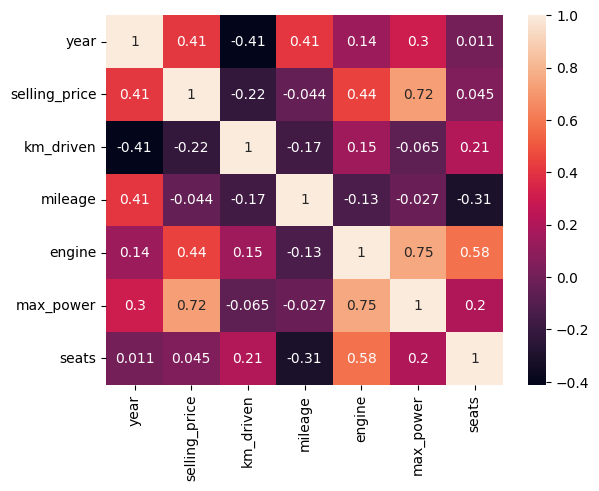

In [18]:
# посмотрим на корреляцию
corr = df[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].corr()
sns.heatmap(corr, annot=True)

Видим наибольшую взаимосвязь между ценой и мощностью, а также - годом выпуска, пробегом и типом двигателя.
У engine и max_power, а также у engine и seats высокий коэффициент корреляции (> 0.6) => возможна мультиколлинеарность

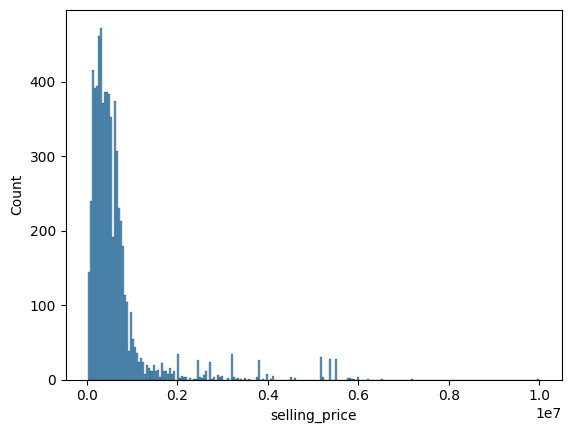

<Axes: xlabel='year', ylabel='Count'>

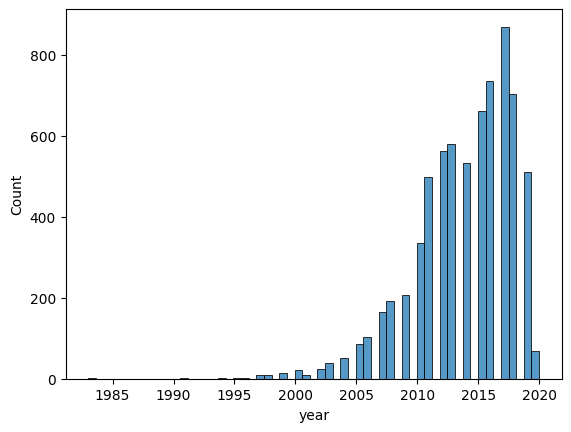

In [19]:
sns.histplot(df['selling_price'])
plt.show()
sns.histplot(df['year'])

In [20]:
df['year'].value_counts()[:10]

2017    870
2016    736
2018    704
2015    662
2013    581
2012    563
2014    532
2019    511
2011    499
2010    336
Name: year, dtype: int64

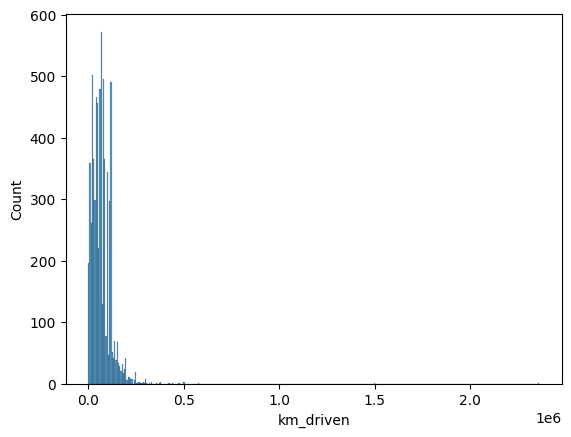

<Axes: xlabel='mileage', ylabel='Count'>

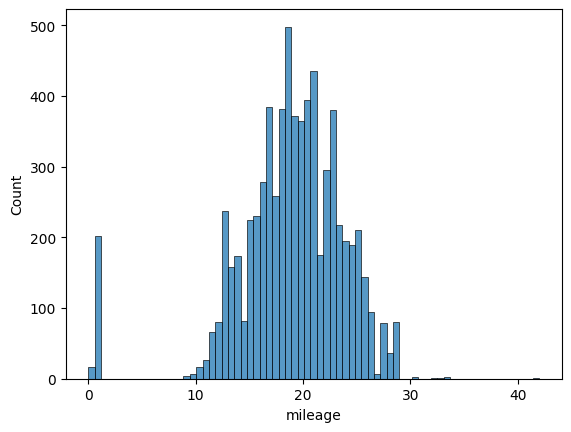

In [21]:
sns.histplot(df['km_driven'])
plt.show()
sns.histplot(df['mileage'])

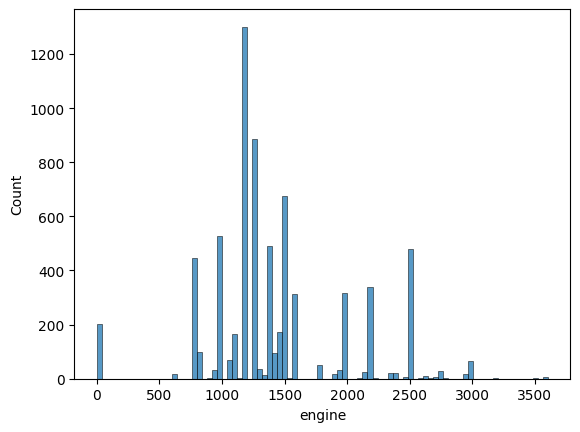

<Axes: xlabel='max_power', ylabel='Count'>

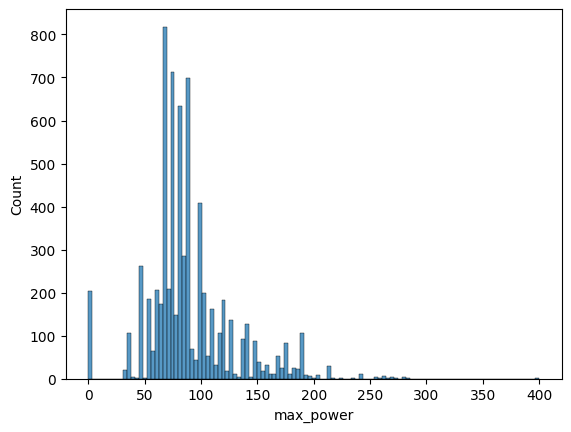

In [22]:
sns.histplot(df['engine'])
plt.show()
sns.histplot(df['max_power'])

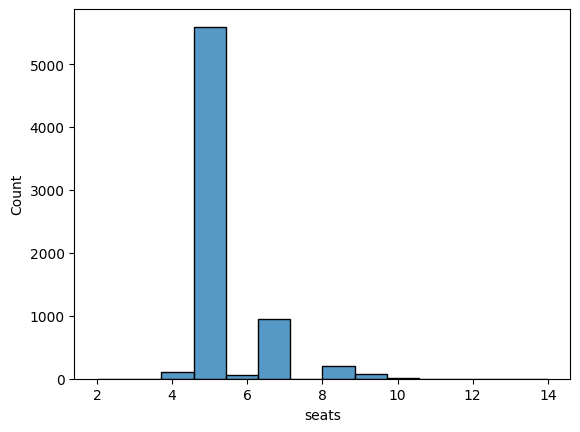

In [23]:
sns.histplot(df['seats'])
plt.show()

In [24]:
df['seats'].value_counts()

5.0     5595
7.0      944
8.0      208
4.0      104
9.0       72
6.0       54
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

Есть выбросы

<ipython-input-25-e3d3e74b5936>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel', data = df, palette='bright')


<Axes: xlabel='fuel', ylabel='count'>

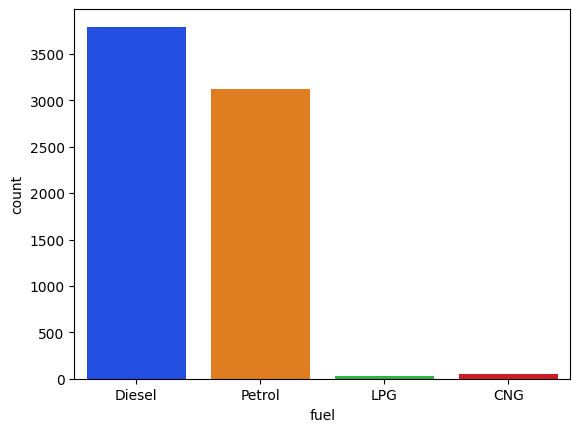

In [25]:
sns.countplot(x='fuel', data = df, palette='bright')

<ipython-input-26-19e5cea6bdc8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fuel', y='selling_price', data = df, palette='summer')


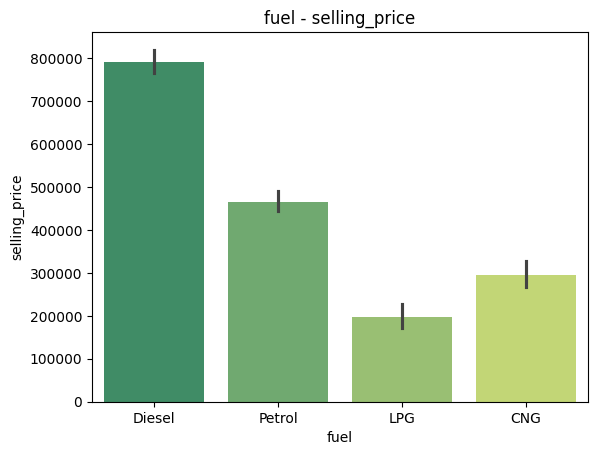

In [26]:
sns.barplot(x='fuel', y='selling_price', data = df, palette='summer')
plt.title('fuel - selling_price')
plt.show()

<ipython-input-27-b59782bf4a49>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seller_type', data = df, palette='bright')


<Axes: xlabel='seller_type', ylabel='count'>

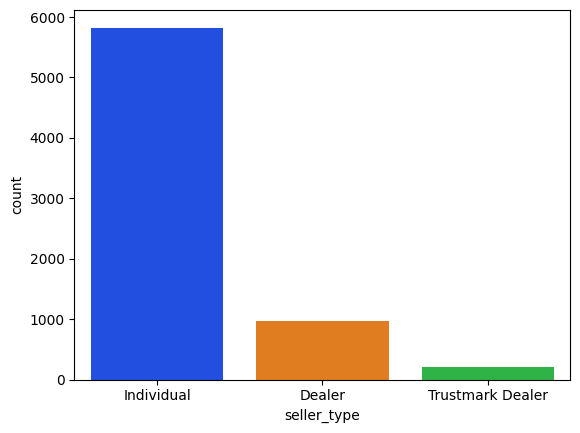

In [27]:
sns.countplot(x='seller_type', data = df, palette='bright')

<ipython-input-28-bc3dfea7c5c4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data = df, palette='summer')


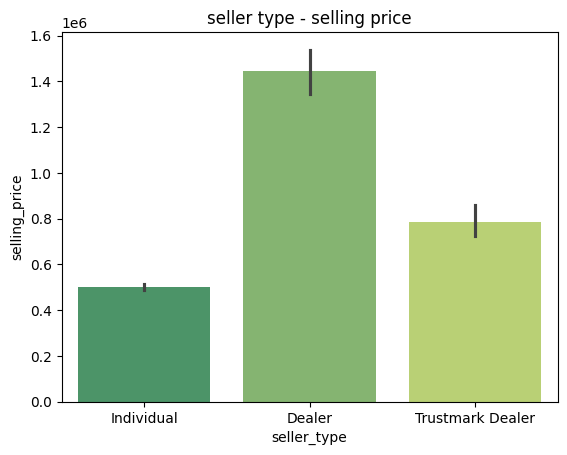

In [28]:
sns.barplot(x='seller_type', y='selling_price', data = df, palette='summer')
plt.title('seller type - selling price')
plt.show()

<ipython-input-29-7e0aa67e53e5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transmission', data = df, palette='bright')


<Axes: xlabel='transmission', ylabel='count'>

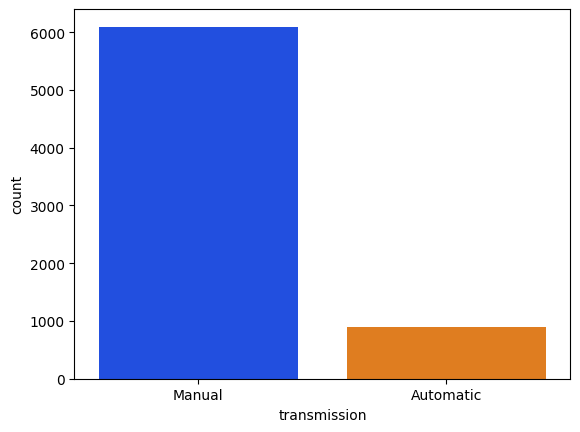

In [29]:
sns.countplot(x='transmission', data = df, palette='bright')

<ipython-input-30-367ede707276>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transmission', y='selling_price', data = df, palette='summer')


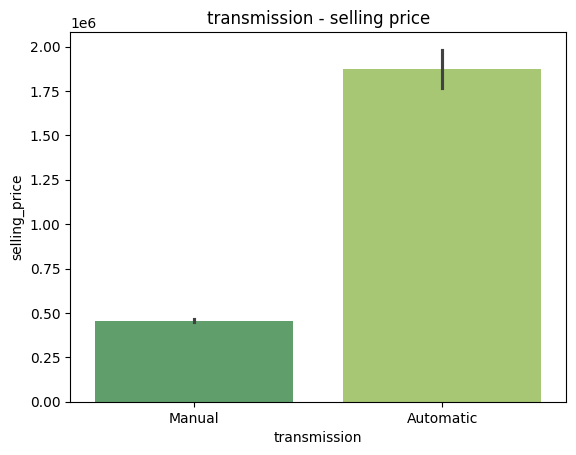

In [30]:
sns.barplot(x='transmission', y='selling_price', data = df, palette='summer')
plt.title('transmission - selling price')
plt.show()

<ipython-input-31-bcc224bc738d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='owner', data = df, palette='bright')


<Axes: xlabel='owner', ylabel='count'>

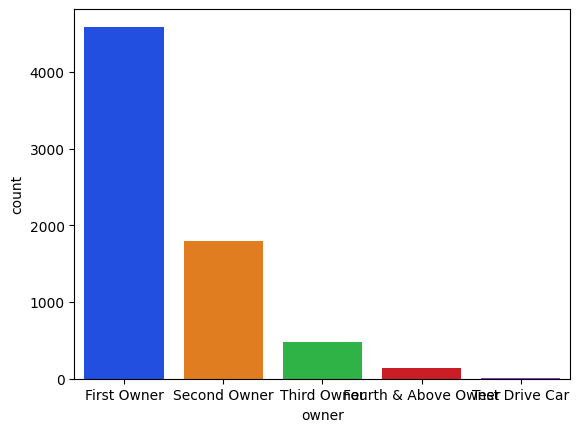

In [31]:
sns.countplot(x='owner', data = df, palette='bright')

<ipython-input-32-8fb181e39c25>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='selling_price', data = df, palette='summer')


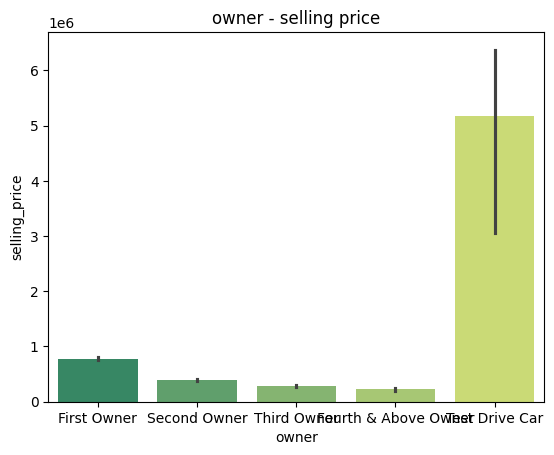

In [32]:
sns.barplot(x='owner', y='selling_price', data = df, palette='summer')
plt.title('owner - selling price')
plt.show()

* Видим, что на цену влияют все показатели

## Машинное обучение

Данная задача представляет собой задачу множественной линейной регрессии, так как нужно предсказать стоимость при учете нескольких параметров

### Обучение без кодирования категориальных признаков

In [33]:
X = df.drop(['selling_price'], axis=1) #матрица объект-признак

y = df['selling_price'] # целевая переменная (target)

X.head(3)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0


In [34]:
y.head(3)

0    450000
1    370000
2    225000
Name: selling_price, dtype: int64

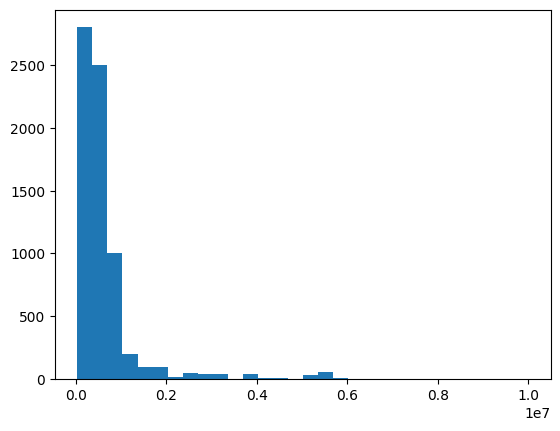

In [ ]:
from matplotlib import pylab as plt

plt.hist(y, bins=30);

In [35]:
X.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque'], axis=1, inplace=True)
X.head(3)

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248.0,74.00,5.0
1,2014,120000,21.14,1498.0,103.52,5.0
2,2010,127000,23.00,1396.0,90.00,5.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((5249, 6), (1750, 6))

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # x -> (x - mean) / std

sc.fit(X_train) # вычисляем mean, std

X_train = pd.DataFrame(sc.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,seats
0,0.781433,-0.251344,1.005619,-0.412871,-0.386777,-0.427705
1,1.273071,-0.955824,-0.168107,0.999436,2.622889,-0.427705
2,0.781433,-0.179323,-0.072253,0.140869,0.288407,1.677335
3,-0.447664,0.597177,-0.070297,-0.393031,-0.230366,-0.427705
4,1.027252,-1.247011,0.007952,-0.393031,-0.182120,-0.427705


#### Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

In [ ]:
# Посмотрим на показатели MAE, MAPE и R^2
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Показатели модели:")
print("MSE =", mean_squared_error(y_test, pred_lr)) # наилучшее - 0.0
print("MAE =", mean_absolute_error(y_test, pred_lr)) # наилучшее - 0.0
print("R^2 =", r2_score(y_test, pred_lr)) # наилучшее - 1.0

Показатели модели:
MSE = 279339022997.603
MAE = 330076.27050907153
R^2 = 0.5717296301132235


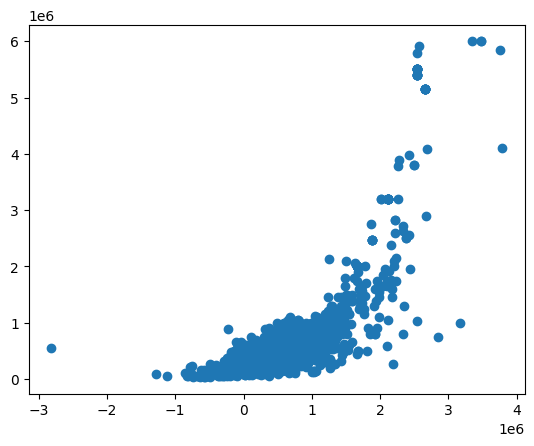

In [ ]:
plt.scatter(pred_lr, y_test)

#### Градиентный спуск

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()

params = {'loss' : ['squared_error'],
          'penalty' : ['l1', 'l2', None],
          'max_iter' : [50000],
          'learning_rate' : ['constant'],
          'eta0' : [0.000001, 0.00001, 0.0001, 0.001, 0.01]}

gs_gd = GridSearchCV(model, params, scoring='r2', cv=5, n_jobs=-1, verbose=2)
gs_gd.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'eta0': [1e-06, 1e-05, 0.0001, 0.001, 0.01],
                         'learning_rate': ['constant'],
                         'loss': ['squared_error'], 'max_iter': [50000],
                         'penalty': ['l1', 'l2', None]},
             scoring='r2', verbose=2)

In [ ]:
gs_gd.best_score_, gs_gd.best_params_

(0.607295535317302,
 {'eta0': 0.0001,
  'learning_rate': 'constant',
  'loss': 'squared_error',
  'max_iter': 50000,
  'penalty': 'l1'})

In [ ]:
pred_gd = gs_gd.best_estimator_.predict(X_test)

In [ ]:
# Посмотрим на показатели MAE, MAPE и R^2
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Показатели модели:")
print("MSE =", mean_squared_error(y_test, pred_gd)) # наилучшее - 0.0
print("MAE =", mean_absolute_error(y_test, pred_gd)) # наилучшее - 0.0
print("R^2 =", r2_score(y_test, pred_gd)) # наилучшее - 1.0

Показатели модели:
MSE = 279507825092.9089
MAE = 329501.7451429859
R^2 = 0.5714708301252429


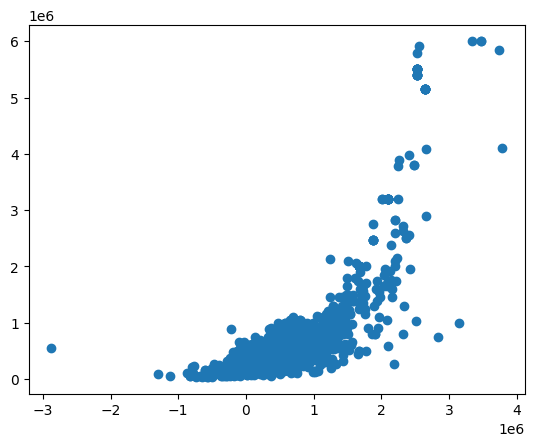

In [ ]:
plt.scatter(pred_gd, y_test)

#### Дерево решений

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

params = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
          'splitter' : ['best', 'random']
          }

gs_dt = GridSearchCV(model, params, scoring='r2', cv=5, n_jobs=-1, verbose=2)
gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=2)

In [ ]:
gs_dt.best_score_, gs_dt.best_params_

(0.9410957335765419, {'criterion': 'friedman_mse', 'splitter': 'random'})

In [ ]:
pred_dt = gs_dt.best_estimator_.predict(X_test)

In [ ]:
# Посмотрим на показатели MAE, MAPE и R^2
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Показатели модели:")
print("MSE =", mean_squared_error(y_test, pred_dt)) # наилучшее - 0.0
print("MAE =", mean_absolute_error(y_test, pred_dt)) # наилучшее - 0.0
print("R^2 =", r2_score(y_test, pred_dt)) # наилучшее - 1.0

Показатели модели:
MSE = 37915382283.104385
MAE = 87384.28971428571
R^2 = 0.9418697945581238


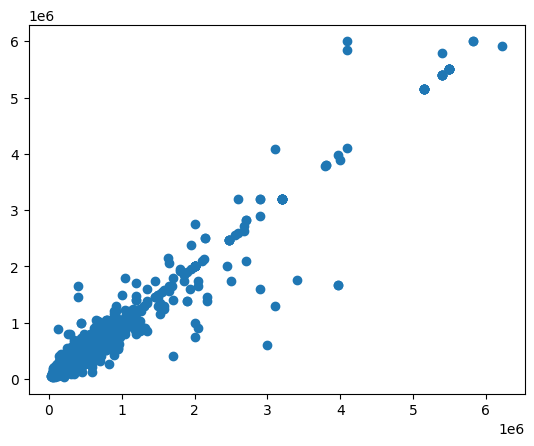

In [ ]:
plt.scatter(pred_dt, y_test)

#### Случайный лес

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

params = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
          }

gs_rf = GridSearchCV(model, params, scoring='r2', cv=5, n_jobs=-1, verbose=2)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson']},
             scoring='r2', verbose=2)

In [ ]:
gs_rf.best_score_, gs_rf.best_params_

(0.9566519422582724, {'criterion': 'absolute_error'})

In [ ]:
pred_rf = gs_rf.best_estimator_.predict(X_test)

In [ ]:
# Посмотрим на показатели MAE, MAPE и R^2
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Показатели модели:")
print("MSE =", mean_squared_error(y_test, pred_rf)) # наилучшее - 0.0
print("MAE =", mean_absolute_error(y_test, pred_rf)) # наилучшее - 0.0
print("R^2 =", r2_score(y_test, pred_rf)) # наилучшее - 1.0

Показатели модели:
MSE = 24166774171.348946
MAE = 72720.88688285713
R^2 = 0.9629485590582071


In [ ]:
pred___ = gs_rf.best_estimator_.predict(X_train)
print("Показатели модели:")
print("MSE =", mean_squared_error(y_train, pred___)) # наилучшее - 0.0
print("MAE =", mean_absolute_error(y_train, pred___)) # наилучшее - 0.0
print("R^2 =", r2_score(y_train, pred___)) # наилучшее - 1.0

Показатели модели:
MSE = 4737065698.982659
MAE = 30735.23108782625
R^2 = 0.9927668762578981


Переобучения нет

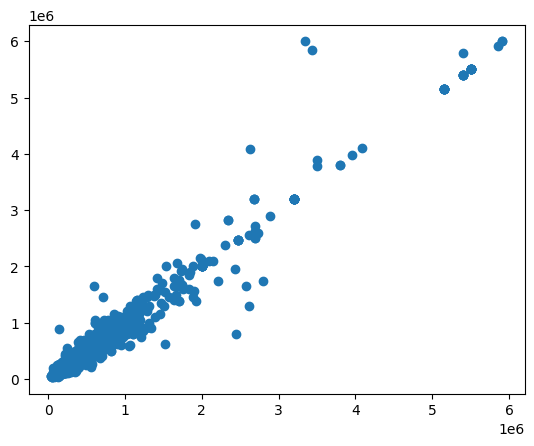

In [ ]:
plt.scatter(pred_rf, y_test)

#### Градиентный бустинг

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

params = {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile']
          }

gs_gb = GridSearchCV(model, params, scoring='r2', cv=5, n_jobs=-1, verbose=2)
gs_gb.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile']},
             scoring='r2', verbose=2)

In [ ]:
gs_gb.best_score_, gs_gb.best_params_

(0.9467793388381651, {'loss': 'squared_error'})

In [ ]:
pred_gb = gs_gb.best_estimator_.predict(X_test)

In [ ]:
# Посмотрим на показатели MAE, MAPE и R^2
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Показатели модели:")
print("MSE =", mean_squared_error(y_test, pred_gb)) # наилучшее - 0.0
print("MAE =", mean_absolute_error(y_test, pred_gb)) # наилучшее - 0.0
print("R^2 =", r2_score(y_test, pred_gb)) # наилучшее - 1.0

Показатели модели:
MSE = 27668771513.18207
MAE = 94158.63387200648
R^2 = 0.957579449934695


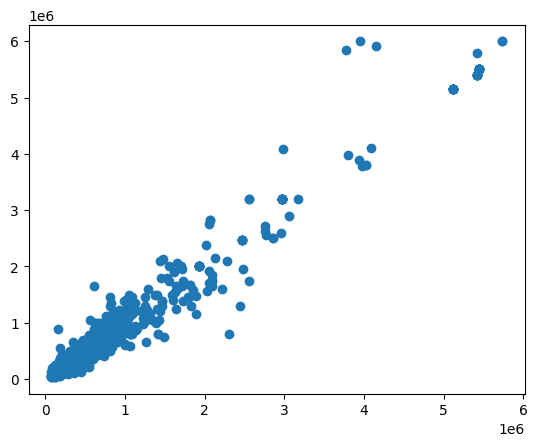

In [ ]:
plt.scatter(pred_gb, y_test)

Лучше всего себя проявил случайный лес.

### Обучение с масштабированием и One Hot Encoding

In [ ]:
# df['selling_price'].skew()

Распределение цен далеко от нормального и смещено вправо. Прологарифмируем их



In [ ]:
# prices_log = np.log(df['selling_price'])
# sns.histplot(prices_log)
# plt.title(f'log_prices with skew {prices_log.skew()}')


Закодируем категориальные признаки fuel, seller_type, transmission, owner

In [36]:
df[['fuel', 'seller_type', 'transmission', 'owner']].nunique()

fuel            4
seller_type     3
transmission    2
owner           5
dtype: int64

In [37]:
pd.get_dummies(df['fuel'])

,CNG,Diesel,LPG,Petrol
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
6994,0,0,0,1
6995,0,1,0,0
6996,0,1,0,0
6997,0,1,0,0


In [38]:
X = X.join(pd.get_dummies(df['fuel']))
X = X.join(pd.get_dummies(df['seller_type']))
X = X.join(pd.get_dummies(df['transmission']))
X = X.join(pd.get_dummies(df['owner']))
X.head()

,year,km_driven,mileage,engine,max_power,seats,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2014,145500,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,2014,120000,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,2010,127000,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
3,2007,120000,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2017,45000,20.14,1197.0,81.86,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0


In [39]:
X[X.columns[6:]].sum()

CNG                       52
Diesel                  3793
LPG                       34
Petrol                  3120
Dealer                   967
Individual              5826
Trustmark Dealer         206
Automatic                904
Manual                  6095
First Owner             4587
Fourth & Above Owner     144
Second Owner            1791
Test Drive Car             4
Third Owner              473
dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((5249, 20), (1750, 20))

In [41]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

sc.fit(X_train)

X_train = pd.DataFrame(sc.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

In [42]:
X_test

,year,km_driven,mileage,engine,max_power,seats,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,0.972973,0.023333,0.547857,0.276997,0.167500,0.250000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.810811,0.038895,0.518810,0.276720,0.167625,0.250000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.810811,0.019999,0.440476,0.331951,0.207125,0.250000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.729730,0.046666,0.404762,0.331951,0.200000,0.250000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.594595,0.079999,0.390476,0.525954,0.225000,0.250000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,0.810811,0.089999,0.461905,0.389680,0.175000,0.250000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1746,0.918919,0.033333,0.502381,0.225651,0.138000,0.250000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1747,0.756757,0.046666,0.548333,0.387182,0.172500,0.250000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1748,0.729730,0.079999,0.333333,0.690538,0.237500,0.500000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Используем MinMaxScaler, чтобы категориальные признаки корректно масштабировались.

In [43]:
import pickle

with open('scaler.pickle', 'wb') as f:
    pickle.dump(sc, f)

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

params = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
          }

gs_rf = GridSearchCV(model, params, scoring='r2', cv=5, n_jobs=-1, verbose=2)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson']},
             scoring='r2', verbose=2)

In [108]:
gs_rf.best_score_, gs_rf.best_params_

(0.9579226316959082, {'criterion': 'squared_error'})

In [109]:
pred_rf = gs_rf.best_estimator_.predict(X_test)

In [110]:
# Посмотрим на показатели MAE, MAPE и R^2
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Показатели модели:")
print("MSE =", mean_squared_error(y_test, pred_rf)) # наилучшее - 0.0
print("MAE =", mean_absolute_error(y_test, pred_rf)) # наилучшее - 0.0
print("R^2 =", r2_score(y_test, pred_rf)) # наилучшее - 1.0

Показатели модели:
MSE = 26668962557.91458
MAE = 73186.05782569888
R^2 = 0.9591123132865232


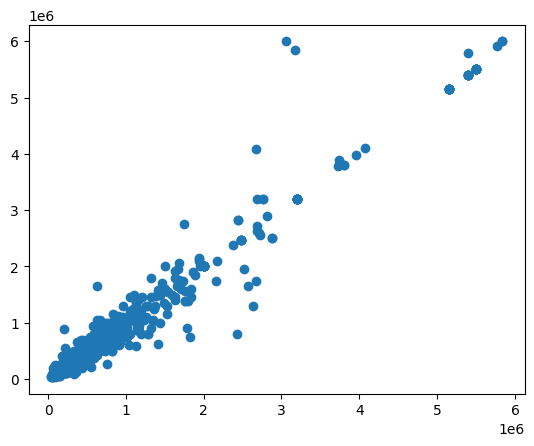

In [111]:
plt.scatter(pred_rf, y_test)

In [ ]:
# importances = pd.DataFrame({'weights': model.coef_, 'features': X_train.columns}).sort_values(by='weights')
# importances.head(30)

In [116]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(gs_rf.best_estimator_, f)

# а так модель можно загрузить из файла:
# with open('model.pickle', 'rb') as f:
#     model = pickle.load(f)

In [114]:
gs_rf.best_estimator_.predict(pd.DataFrame(X_test.iloc[0]).transpose())

array([324959.99])

In [113]:
y_test

6565    300000
2943    225000
2024    360000
263     300000
4586    250000
         ...  
1966    210000
3166    270000
2018    215000
2406    300000
6763    626000
Name: selling_price, Length: 1750, dtype: int64

In [82]:
type(X_train.iloc[0])

pandas.core.series.Series

In [115]:
pd.DataFrame(X_train.iloc[0]).transpose()

,year,km_driven,mileage,engine,max_power,seats,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,0.918919,0.037526,0.571429,0.328898,0.184925,0.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
